In [1]:
import sys
from matplotlib import rc
rc('text', usetex=True)
from ExpData import ExpData
import ExpData as ed

In [2]:
e1f_binned = ExpData('/home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_exp_h6_top1.root')

Setting up binned data for /home/ephelps/projects/phys-ana-omega/e1f6/test/e1f_exp_h6_top1.root:h6_eid_efid_nphe_hfid_pcor_badsc_mmp


In [3]:
%run util_draw.py

def mdraw2d(hists, rows=2, cols=3, xlabel='', ylabel='',
            xlims=None, ylims=None, vmin=None, vmax=None,
            space=0, grid=False, figsize=None, **kwargs):
    nr, nc = rows, cols
    if figsize is None:
        figsize=goldenaspect(6.5,nr,nc)
    fig = plt.figure(figsize=figsize)
    gs = gridspec.GridSpec(nr, nc, wspace=space, hspace=2*space, left=0.1, right=0.95, bottom=0.175)
    im = None
    vmax = 0.9*max([h.GetMaximum() for h in hists]) if vmax is None else vmax
    for irow in range(0,nr):
        for icol in range(0,nc):
            hnum = nc*irow+(icol+1)
            h = hists[hnum-1]
            ax = plt.subplot(gs[irow, icol])
            im = rplt.imshow(asrootpy(h), axes=ax, vmin=vmin, vmax=vmax, **kwargs)
#             rplt.hist2d(h, axes=ax, **kwargs) #, norm=LogNorm())
            if xlims is not None:
                plt.xlim(xlims)
            if ylims is not None:
                plt.ylim(ylims)
            if icol > 0:
                ax.set_yticklabels('')
            if irow+1 < nr:
                ax.set_xticklabels('')
            if grid is True:
                plt.grid()
    fig.add_axes([0.06, 0.105, 0.94, 0.895], frameon=False)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
#     fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.975, 0.2, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    return fig

In [4]:
h2set = e1f_binned.get_h2s(1.87, [1.35,1.85], 5)
h2set[3][1].Scale(h2set[0].Integral()/h2set[3][1].Integral())
hmmp = h2set[1][2]

INFO:ROOT.TCanvas.MakeDefCanvas]  created default TCanvas with name c1


adding key 1870x20_1600x500_iter5


In [5]:
result = W, Q2, hmmp, bgparms, f, parms, q, stat = ed.fit_mmp(hmmp, 1.850, 1.600)

In [6]:
result

(1.85,
 1.6,
 Hist('hbd_yield_proj_5'),
 (-825.5127884664404,
  1.0000004440892094,
  3265.0031170799894,
  0.9167279699996712,
  0.0172611106099538),
 <ROOT.TF1 object ("fsigbg") at 0xfb8c720>,
 (-825.5127884664404,
  0.850024577783653,
  3297.008863913712,
  0.9167279699999984,
  0.01725946048676304,
  2036.2377305339287,
  0.7807300869310483,
  0.017464485800325544),
 4.256195345611811,
 'CONVERGED ')

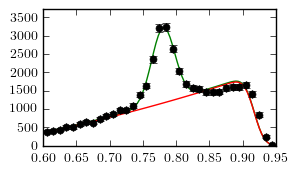

In [7]:
draw(result[2])
fitted_points = get_points_from_TF1(result[4], 0.6, 0.95)
X, Y = zip(*fitted_points)
Y_bg = [ed.bgfun([x], bgparms) for x in X]
plt.plot(X, Y)
plt.plot(X, Y_bg)
plt.show()

In [8]:
result[2].GetName()

'hbd_yield_proj_5'

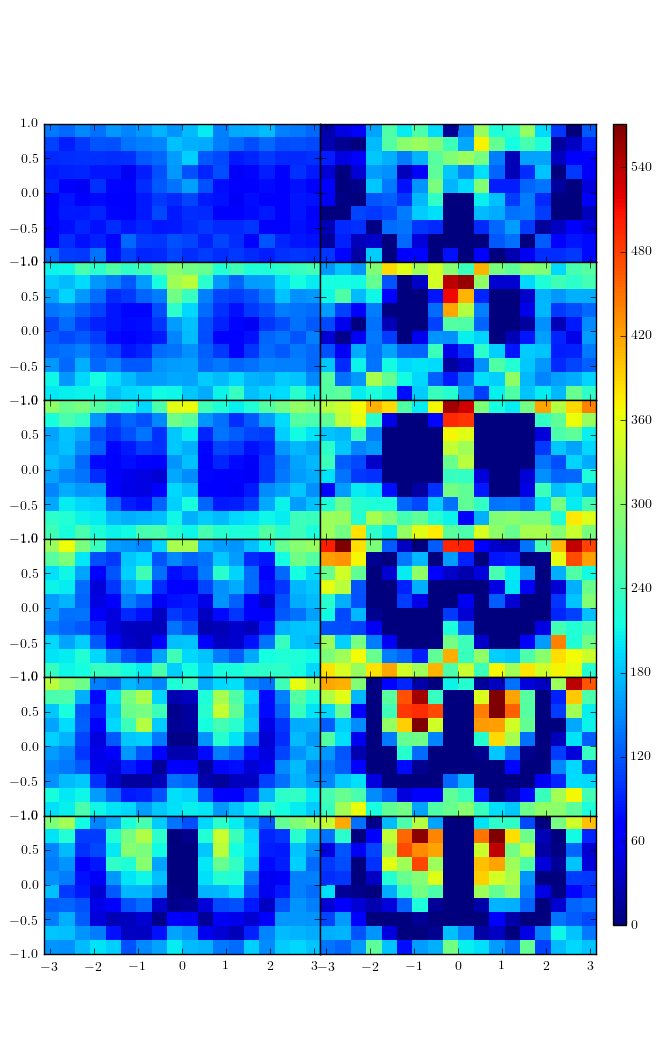

In [25]:
h2s = []
hmmpfit_results = []
for w in np.arange(1.73, 1.94, 0.04):
    h2set = e1f_binned.get_h2s(w, [1.35,1.85], 8)
    h2s.extend([h2set[3][1]] + [h2set[0]])
    h2set[0].Scale(h2set[3][1].Integral()/h2set[0].Integral())
    hmmpfit_results.append(h2set[1])
    #print(h2set[0].Integral(), h2set[3][1].Integral())
mdraw2d(h2s,len(hmmpfit_results),2, vmin=0)
plt.show()

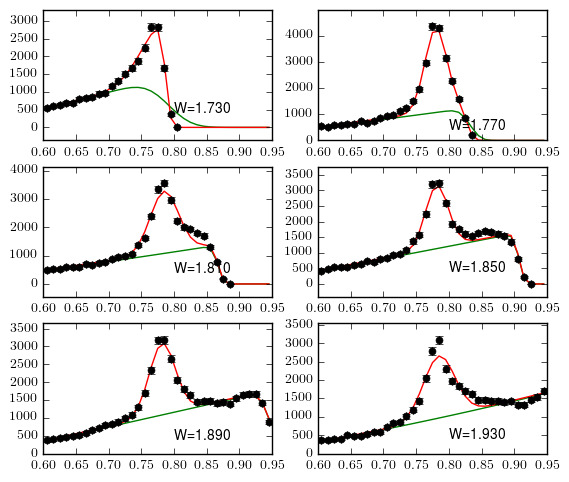

In [26]:
hmmps = []
bgs = []
sigbgs = []
for result in hmmpfit_results:
    W,Q2,hmmp,bgparms,f,parms,q,stat = result
    hmmps.append(asrootpy(hmmp))
    X = [hmmp.GetBinCenter(mmpbin) for mmpbin in range(1,hmmp.GetNbinsX()+1)]
    Y_bg = [ed.bgfun([x], bgparms) for x in X]
    bgs.append((X,Y_bg))
    Y = [ed.fitfun([x], parms) for x in X]
    sigbgs.append((X,Y))
fig = mdraw(hmmps, 2, 3)
for ax,results,bg,sigbg in zip(fig.get_axes(),hmmpfit_results,bgs,sigbgs):
    X, Y = sigbg
    _, Y_bg = bg
    ax.plot(X, Y_bg)
    ax.plot(X, Y)
    W, Q2 = results[0], sum(results[1])/2
    ax.text(0.8, 400, 'W=%.3f'%(W))
plt.show()

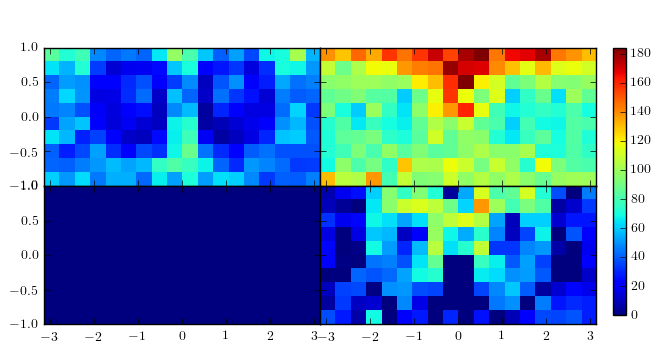

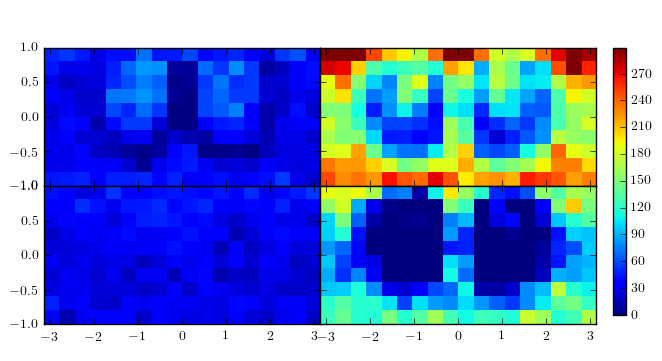

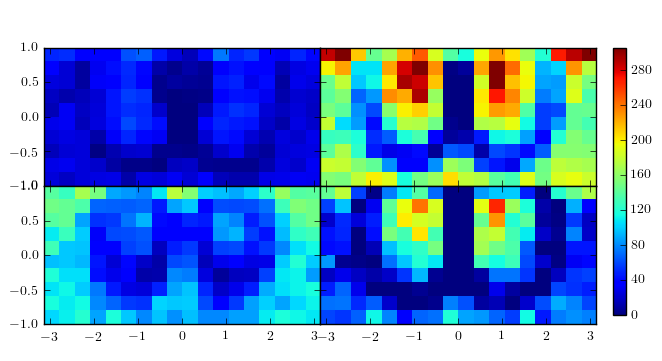

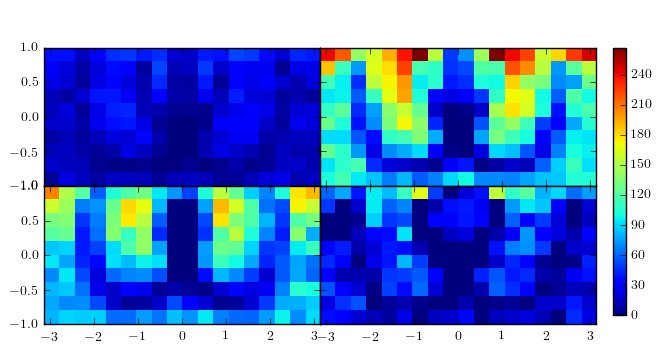

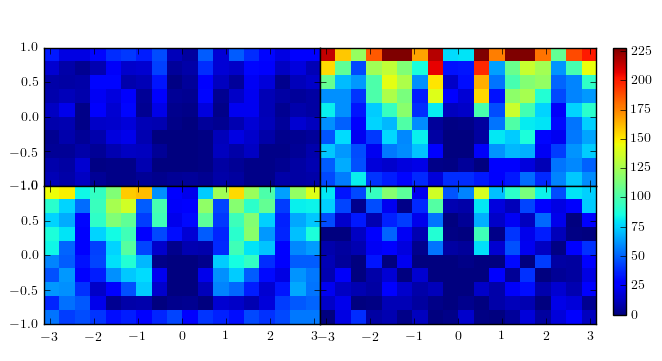

adding key 2230x20_1600x500_iter5


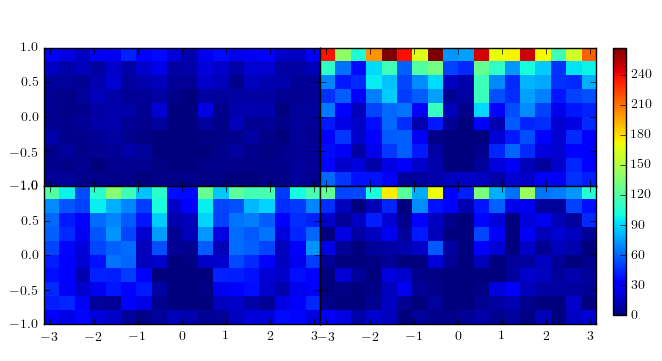

adding key 2330x20_1600x500_iter5


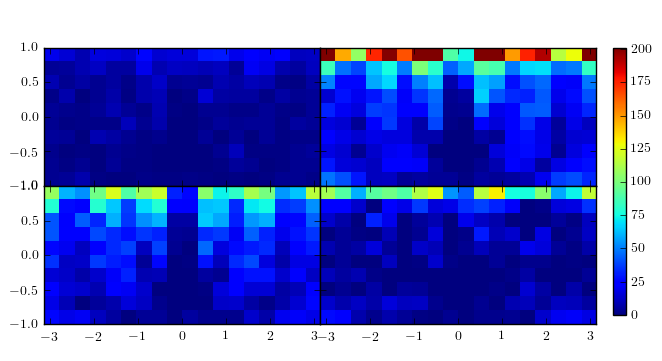

adding key 2430x20_1600x500_iter5


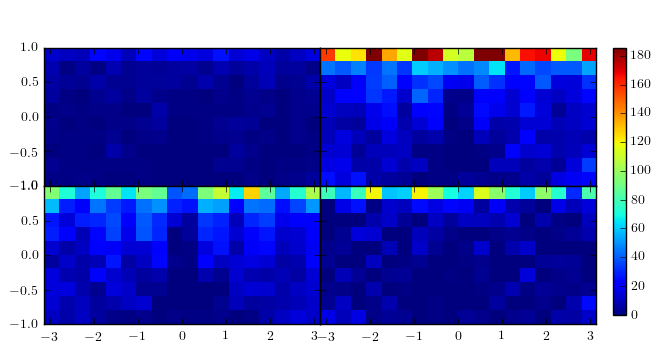

adding key 2530x20_1600x500_iter5


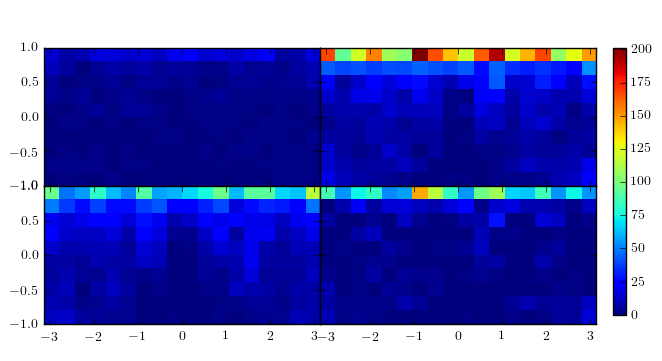

adding key 2630x20_1600x500_iter5


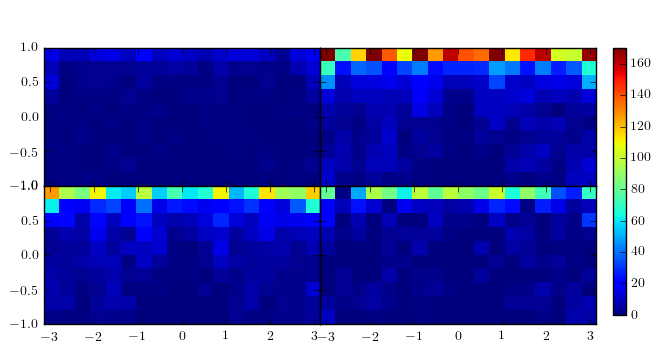

adding key 2730x20_1600x500_iter5


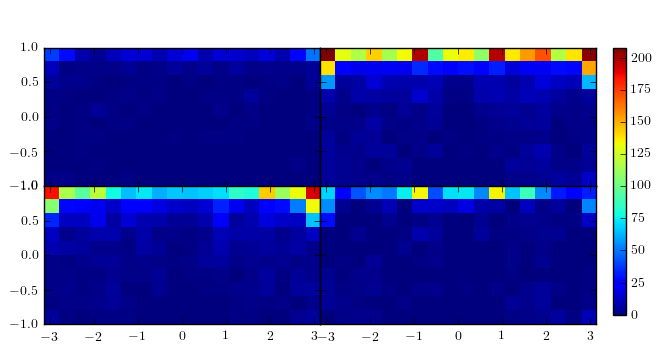

In [22]:
for w in np.arange(1.73, 2.74, 0.1):
    h2set = e1f_binned.get_h2s(w, [1.35,1.85])
    h2s = h2set[3] + [h2set[0]]
    mdraw2d(h2s,2,2, vmin=0)
    plt.show()